# Examplary usage of our Evaluation Pipeline

The pipeline constructs a 4-Fold, each split represents the 10-minute drive of a single person. Therefore, in each fold one person's drive is used as test data whereas the remaining 3 drives are used for training. This approach ensures a stratified cross validation as each person drove the same road with the same labeling. 

![4-Fold CV](4-Fold-CV.png)

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.preprocessing import PreprocessingPipeline

## 1. Preprocessing and 4-Fold CV Setup

In [2]:
# Define the start and end NTP times for each person's drive to remove standing times
ntp_intervals = {  # file+path: (start_ntp, end_ntp)
    '1_marco': ('2024-05-28 15:21:46.830', '2024-05-28 15:36:21.000'),
    '2_svenja': ('2024-05-28 15:39:02.218', '2024-05-28 15:52:16.613'),
    '3_konstantin': ('2024-05-28 15:56:31.000', '2024-05-28 16:09:37.000'),
    '4_aleyna': ('2024-05-28 16:11:31.789', '2024-05-28 16:21:35.000'),
}

In [3]:
pipeline = PreprocessingPipeline(ntp_intervals=ntp_intervals)
splits = pipeline.create_cv_splits()

#### Structure of the splits
splits = [split1, split2, split3, split4]

split1 = (X_train, y_train, X_test, y_test)

In [4]:
# Examplray usage for a 4-Fold Cross-Validation
for i, (X_train, y_train, X_test, y_test) in enumerate(splits):
    print(f'Fold {i+1}')
    print(f'Train: {X_train.shape[0]}, Test: {X_test.shape[0]}\n')


Fold 1
Train: 4366, Test: 1747

Fold 2
Train: 4525, Test: 1587

Fold 3
Train: 4542, Test: 1571

Fold 4
Train: 4908, Test: 1205



In [7]:
# Show first sample of a split
X_train, y_train, X_test, y_test = splits[0]
y_train = y_train.astype(str)
y_test = y_test.astype(str)

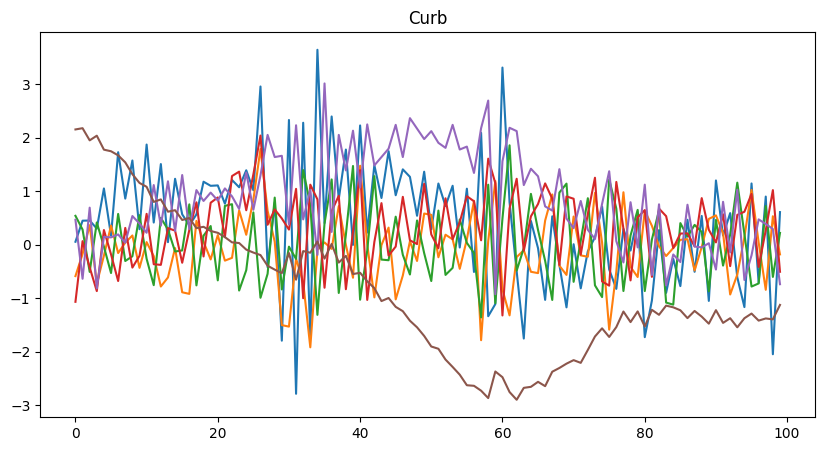

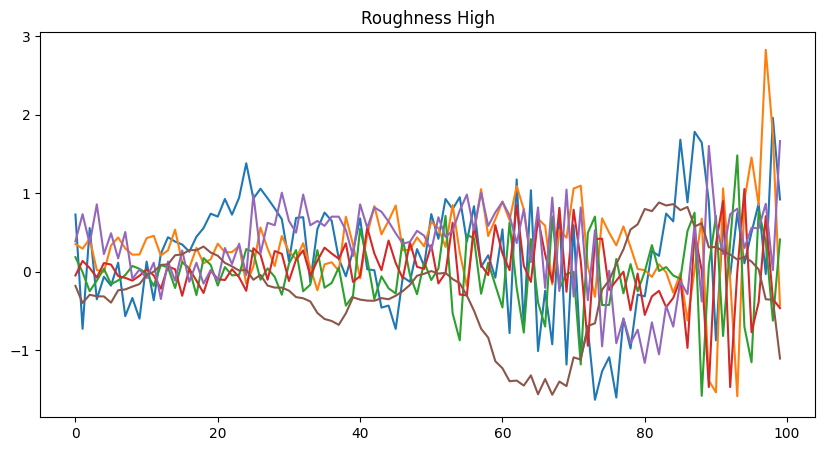

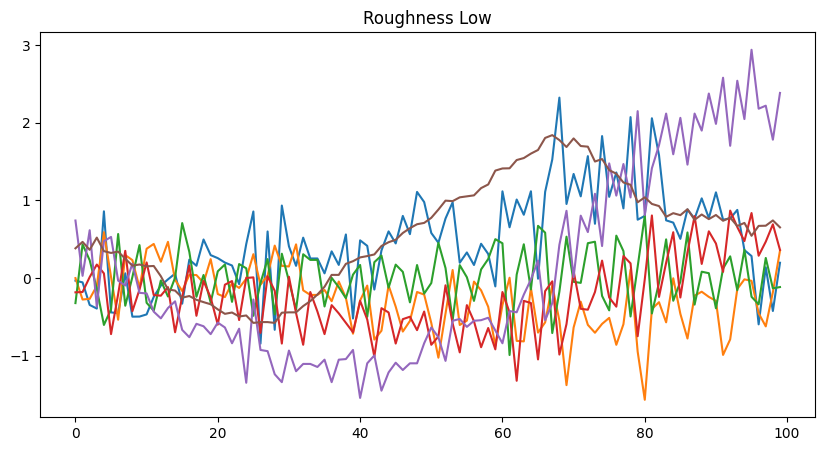

In [8]:
idx = np.random.randint(0, 10)

sample_curb = X_train[y_train == 'curb'][idx]
sample_roughness_high = X_train[y_train == 'roughness_high'][idx]
sample_roughness_low = X_train[y_train == 'roughness_low'][idx]

def plot_sample(sample, label):
    plt.figure(figsize=(10, 5))
    plt.plot(sample)
    plt.title(label)
    plt.show()

plot_sample(sample_curb, 'Curb')
plot_sample(sample_roughness_high, 'Roughness High')
plot_sample(sample_roughness_low, 'Roughness Low')

In [9]:
pd.DataFrame(X_train[0])

,0,1,2,3,4,5
0,0.097265,-0.059806,0.046202,-0.061713,0.029003,-0.012188
1,0.059608,-0.060704,0.058560,-0.002836,0.005543,-0.018559
2,0.092961,-0.022997,0.007757,0.056040,-0.025736,-0.027054
3,-0.018934,-0.115469,0.012792,0.048190,0.075922,-0.020683
4,1.034390,0.367536,-0.424295,-0.615148,-0.612226,0.087624
...,...,...,...,...,...,...
95,-0.069502,-0.632589,0.200441,-0.261891,-0.103935,0.590933
96,-0.110387,-0.410837,0.038422,-0.097038,0.005543,0.576067
97,-0.014630,-0.284251,-0.039384,-0.320768,-0.049196,0.565449
98,-0.429935,-0.462011,0.135450,-0.320768,0.036823,0.514481


## 2. Feature extraction (for supervised feature selection techniques)

In [10]:
from utils.feature_extraction import compute_features

In [11]:
train_features = compute_features(X_train)
train_features.head()

100%|██████████| 4366/4366 [00:14<00:00, 298.00it/s]


,mean_acc_x,median_acc_x,mode_acc_x,std_acc_x,var_acc_x,rms_acc_x,mad_acc_x,avg_deriv_acc_x,skew_acc_x,zcr_acc_x,...,corr_acc_y_acc_z,corr_acc_y_gyro_x,corr_acc_y_gyro_y,corr_acc_y_gyro_z,corr_acc_z_gyro_x,corr_acc_z_gyro_y,corr_acc_z_gyro_z,corr_gyro_x_gyro_y,corr_gyro_x_gyro_z,corr_gyro_y_gyro_z
0,0.044814,0.032172,-0.387974,0.359863,0.129502,0.362643,0.173223,-0.005782,0.621430,41,...,-0.361245,0.254042,-0.017333,-0.522619,-0.070180,0.125179,0.101717,0.046050,-0.401886,-0.241885
1,0.022230,-0.036149,-0.387974,0.547192,0.299419,0.547643,0.301795,-0.012215,0.233170,34,...,0.054048,0.144117,0.062685,-0.370785,-0.073914,-0.499718,0.175643,-0.030123,-0.465385,-0.252933
2,0.354905,0.245742,-0.023238,1.195069,1.428189,1.246654,0.538497,-0.001630,0.491690,40,...,-0.193245,0.198488,-0.051900,0.075248,-0.204857,-0.068965,0.089052,0.008567,-0.200159,-0.528498
3,0.456170,0.342575,-3.807244,1.138689,1.296612,1.226663,0.466949,-0.028267,0.403273,40,...,-0.521520,0.356030,-0.007606,-0.032440,-0.281011,0.109411,0.093527,0.202940,-0.343194,-0.686681
4,0.222932,0.278557,0.384535,0.733052,0.537365,0.766201,0.465873,0.001934,-0.320178,32,...,-0.528906,0.402836,-0.023395,-0.284889,-0.189775,0.105017,0.065608,0.098832,-0.351153,-0.491356


In [14]:
train_features['mean_acc_x']

0       0.044814
1       0.022230
2       0.354905
3       0.456170
4       0.222932
          ...   
4361    0.073541
4362   -0.091279
4363   -0.188295
4364   -0.115121
4365    0.084462
Name: mean_acc_x, Length: 4366, dtype: float64